# Gradient descent principles
#### Flàvia Ferrús and David Rosado

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### **1.Gradient descent methods**

### 1.1. A simple quadratic function

We begin with a simple two-dimensional function, namely $f(x_1,x_2)=x_1^2+x_2^2$. Let us plot the function to get familiarize with it.

In [10]:
def f(x,y):
    return x**2 + y**2

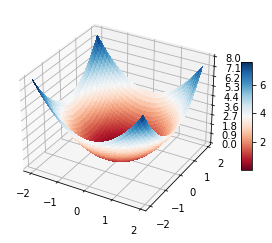

In [11]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

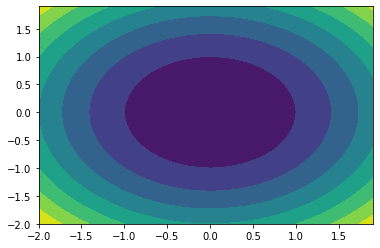

In [12]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

We begin some experiments with gradient descent using a constant step
\begin{align*}
\textbf{x}^{k+1}=\textbf{x}^k-\alpha^k\nabla f(\textbf{x}^k)
\end{align*}

#### 1.Implement the previous algorithm with a constant $\alpha^k=0.1$ parameter.

In [13]:
#We compute the gradient of the function
def grad_f(x,y):
  return np.array([2*x, 2*y])

In [14]:
# Compute the gradient descent method for a given initial point and number of steps
def gradDescent( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(1,steps):
        x_k = x_0-alpha*grad_f(x_0[0],x_0[1])
        x_0 = x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path

In [15]:
#Function that plots the path of gradient descent for a given initial point and number of steps
def plotGrad(x0, steps, alpha=0.1):
    if x0[0] == 0:
        x=np.arange(-1-0.1,1+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-1-0.1,1+0.1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]) -0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f(X,Y)
    x_path, y_path = gradDescent(x0, steps, alpha)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])
    #print(len(x_path))

In a moment, we will see that the algorithm is always converging to the global minimum of the function, $(0,0)$. Let us draw the path
the gradient descent follows for each of the starting points $x_0$ we have studied.

2.5462949704181097e-10 5.092589940836219e-10


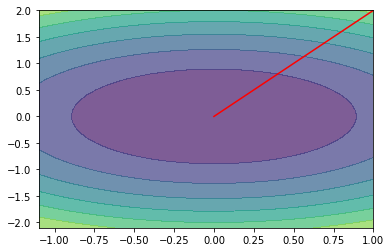

In [16]:
x_0 = [1,2]
plotGrad(x_0, 100)

We can now contrast different number of iterations and different starting points when considering the regular gradient descent method with constant step. 

Note that, evidently, the output is closer to the minimum when more iterations are considered, and when the initial point is already closer to the extreme point we are seeking for, as would be expected by intuition. 

0.13421772800000004 0.26843545600000007


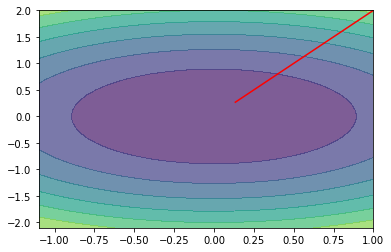

In [17]:
plotGrad([1,2], 10)

0.13421772800000004 0.13421772800000004


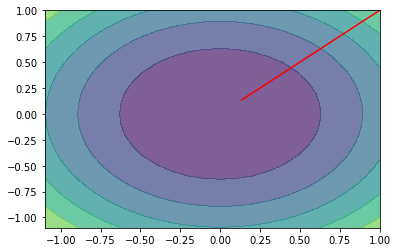

In [18]:
plotGrad([1,1], 10)

2.5462949704181097e-10 2.5462949704181097e-10


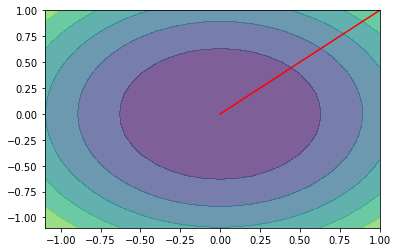

In [19]:
plotGrad([1,1], 100)

1.2731474852090548e-09 7.638884911254329e-10


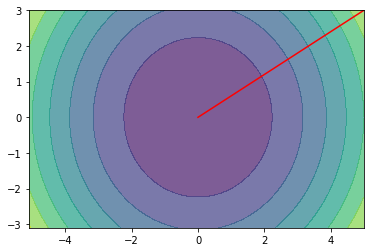

In [20]:
plotGrad([5,3], 100)

#### 2.Try other values of $\alpha$ such as $\alpha^k=1$ or $\alpha^k=2$.

-1.0 -2.0


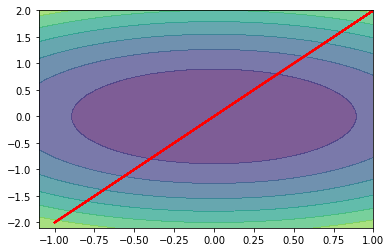

In [21]:
plotGrad([1,2], 100, alpha = 1)

9.948742818458484e+17 1.989748563691697e+18


/var/folders/df/4599m83s2vj4j1_h__gx7kqw0000gn/T/ipykernel_846/2292089701.py:3: RuntimeWarning: overflow encountered in long_scalars
  return np.array([2*x, 2*y])


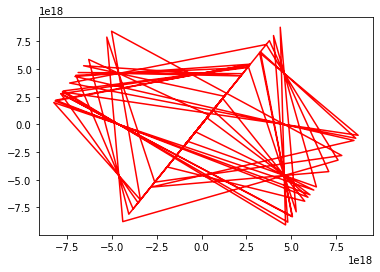

In [22]:
plotGrad([1,2], 100, alpha = 2)

In this case the gradient descent performs poorly due to the too bigger steps. Actually, it does not works.

### 1.2 A function with a multiple minima

Consider now the following function:
$$ 
f(x_1, x_2) = x_1^2f(\mathbf{x}) = x_1^2(4-2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2).
$$
Let's first consider the corresponding 3D plot and contour plot:

In [23]:
def f12(x,y):
    return x**2*(4-2.1*x**2 + (1/3)*x**4) + x*y + y**2*(-4+4*y**2)

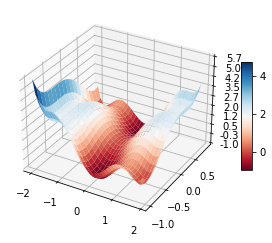

In [24]:
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f12(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

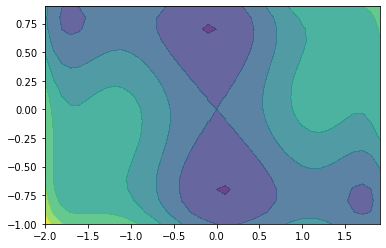

In [25]:
fig, ax = plt.subplots()
ax.contourf(X, Y, Z, alpha= .8)

plt.show()

Note that this function has several local minimums, and therefore the descend algorithm may converge on different minimums depending on the initial value taken.

#### 1. Let's follow the gradient descent with 100 iterations at different starting points.

In [29]:
def grad12(x,y):
    return np.array([2*x*(4-2.1*x**2 + (1/3)*x**4) + x**2*(-2*2.1*x + (4/3)*x**3)+y,
                     x+2*y*(-4+4*y**2) + 8*y**3])
#Function that computes gradient descent for the above function for a given initial point and number of steps
def gradDescent12( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(1,steps):
        x_k = x_0-alpha*grad12(x_0[0],x_0[1])
        x_0 = x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path
#Function that plots the path of gradient descent for the above function for a given initial point and number of steps
def plotGrad12(x0, steps, alpha=0.1):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path = gradDescent12(x0, steps, alpha)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')

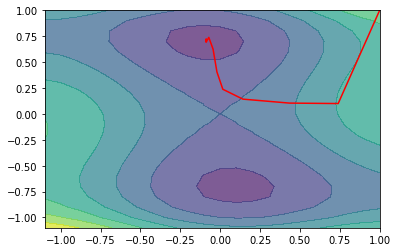

In [30]:
plotGrad12([1,1], 100)

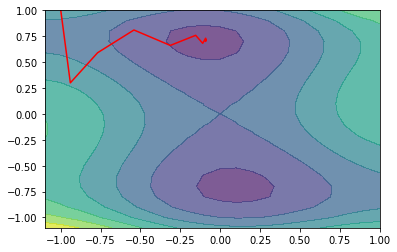

In [31]:
plotGrad12([-1,1], 100)

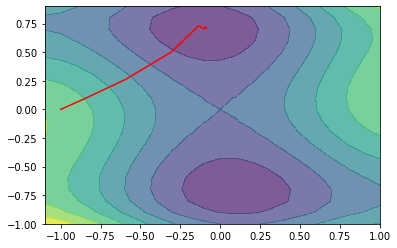

In [32]:
plotGrad12([-1,0], 100)

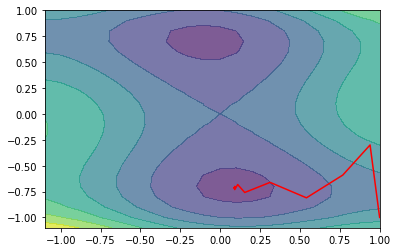

In [33]:
plotGrad12([1,-1], 100)

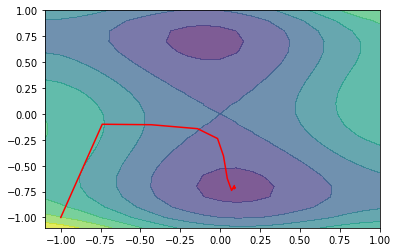

In [34]:
plotGrad12([-1,-1], 100)

Note that the algorithm usually converges to the minimum located in the valley to which x0 belongs.

#### 2. Gradient descent with adaptable step size.

Let's consider the double loop procedure to perform the gradient descent adapting the value of the step size:

In [35]:
def doubleloop12(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad12(x_0[0],x_0[1])
      while f12(x_k[0],x_k[1])>f12(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0-alpha*grad12(x_0[0],x_0[1])
      if f12(x_k[0],x_k[1])<f12(x_0[0],x_0[1]):
        if abs(f12(x_k[0], x_k[1]) - f12(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
          x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i

In [41]:
def plotDoubleLoop12(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1-0.1,1+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-1-0.1,1+0.1, 0.1)
    else: 
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path,iter = doubleloop12(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1],y_path[-1])
    print('The method has converged after '+str(iter)+ ' iterations.\n')

0.08772143909071128 -0.7034196139099396
The method has converged after 6 iterations.



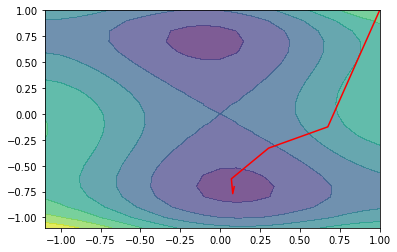

In [42]:
plotDoubleLoop12([1,1], thres= 1e-3)

-0.1028573572882394 0.7141285091016496
The method has converged after 12 iterations.



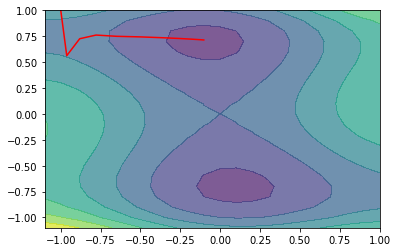

In [43]:
plotDoubleLoop12([-1,1], thres= 1e-3)

0.08396862093227253 -0.7016744125012935
The method has converged after 8 iterations.



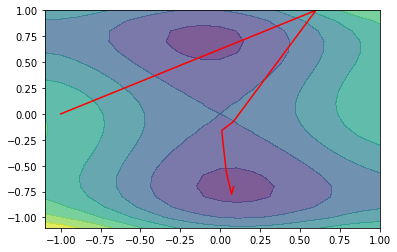

In [44]:
plotDoubleLoop12([-1,0], thres= 1e-3)

0.1028573572882394 -0.7141285091016496
The method has converged after 12 iterations.



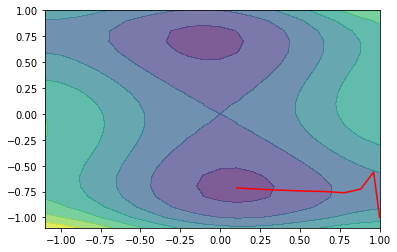

In [45]:
plotDoubleLoop12([1,-1], thres= 1e-3)

-0.08772143909071128 0.7034196139099396
The method has converged after 6 iterations.



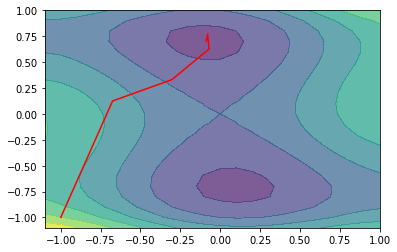

In [46]:
plotDoubleLoop12([-1,-1], thres= 1e-3)

The method is really fas, we do not need even 20 iterations to convergence in most of the cases. The algorithm is superior compared to those presented before.

### 1.3 The Rosenbrock function

The Rosenbrock function is $f(x_1,x_2)=(a-x_1)^2+b(x_2-x_1^2)^2$. It turns out that the function has a global minimum at $(x_1^*,x_2^*)=(a,a^2)$, where $f(x_1^*,x_2^*)=(0,0)$. The global minimum
is inside a long, very narrow, parabolic shaped valley.

#### 1. Plot the contours of the Rosenbrock function for $a = 1$ and $b = 100$.

In [47]:
def fR(x,y,a,b):
  return (a-x)**2 + b*(y-x**2)**2

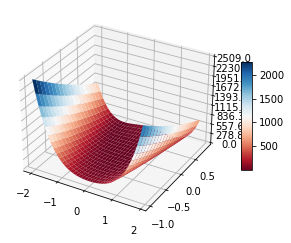

In [48]:
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fR(X,Y,1,100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

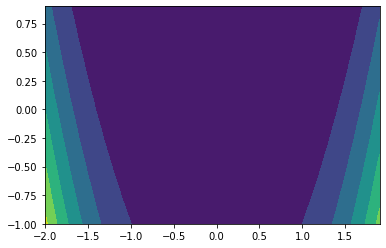

In [49]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

The gradient of the function is the following

In [50]:
def grad_fR(x,y,a,b):
  return np.array([-2*(a-x)-2*b*(y-x**2)*2*x,2*(y-x**2)])

#### 2. Check the robustness of the backtracking descent algorithm you have implemented.

Let us do the algorithm implemented above from different initial points to see if the method works. 

In [51]:
def doubleloop_R(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      while fR(x_k[0],x_k[1],1,100)>fR(x_0[0],x_0[1],1,100):
        alpha=alpha/2
        x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      if fR(x_k[0],x_k[1],1,100)<fR(x_0[0],x_0[1],1,100):
        if abs(fR(x_k[0], x_k[1],1,100) - fR(x_0[0], x_0[1],1,100)) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]

        
    return x_path, y_path,i

In [56]:
def plotDoubleLoop_R(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1-0.1,1+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-1-0.1,1+0.1, 0.1)
    else: 
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= fR(X,Y,1,100)
    x_path, y_path,iter = doubleloop_R(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1],y_path[-1])
    print('The method has converged after '+str(iter)+ ' iterations.\n')

0.00729688542313331 -0.6752243899154372
The method has converged after 99 iterations.



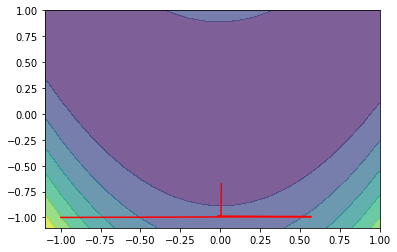

In [57]:
plotDoubleLoop_R([-1,-1], thres= 1e-3)

0.19377003071828947 0.014096895846296519
The method has converged after 16 iterations.



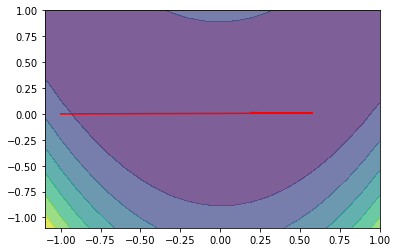

In [58]:
plotDoubleLoop_R([-1,0], thres= 1e-3)

0.17490470402186434 0.01194875315251222
The method has converged after 58 iterations.



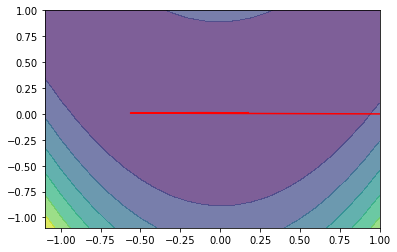

In [59]:
plotDoubleLoop_R([1,0], thres= 1e-3)

0.17490470402186434 0.01194875315251222
The method has converged after 59 iterations.



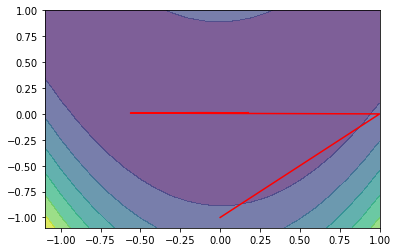

In [60]:
plotDoubleLoop_R([0,-1], thres= 1e-3)

0.704541929229052 0.498040578840909
The method has converged after 4 iterations.



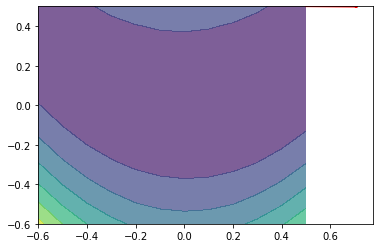

In [63]:
plotDoubleLoop_R([0.5,0.5], thres= 1e-3)

1.0102818613383284 1.017456333635894
The method has converged after 10 iterations.



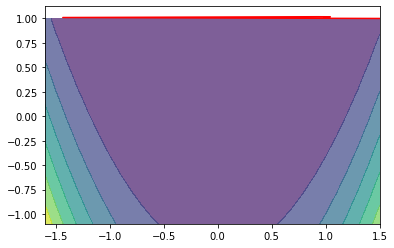

In [64]:
plotDoubleLoop_R([1.5,1], thres= 1e-3)

Note that the method is not working. Let us modify the criterion (by putting lower thresholds, for instance) to see if it is able to find the minimum

0.7082462580917616 0.4995632146067387
The method has converged after 99 iterations.



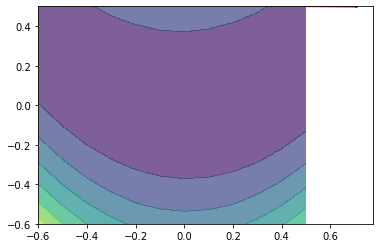

In [65]:
plotDoubleLoop_R([0.5,0.5], thres= 1e-7)

0.19527326480165247 0.018516134134773644
The method has converged after 99 iterations.



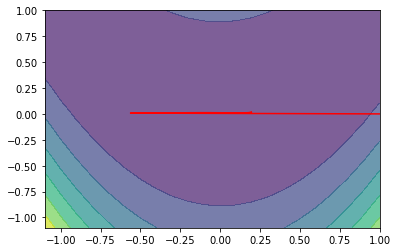

In [66]:
plotDoubleLoop_R([1,0], thres= 1e-6)

Notice that even putting lower thresholds, we are not able to find the minimum. Let us prove to change the condition and check $||\nabla f(x_k)||<10^{-6}$.

In [67]:
def doubleloop_R_mod(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      while fR(x_k[0],x_k[1],1,100)>fR(x_0[0],x_0[1],1,100):
        alpha=alpha/2
        x_k=x_0-alpha*grad_fR(x_0[0],x_0[1],1,100)
      if fR(x_k[0],x_k[1],1,100)<fR(x_0[0],x_0[1],1,100):
        if abs(grad_fR(x_k[0],x_k[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]

        
    return x_path, y_path,i

In [69]:
def plotDoubleLoop_R_mod(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1-0.1,1+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-1-0.1,1+0.1, 0.1)
    else: 
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= fR(X,Y,1,100)
    x_path, y_path,iter = doubleloop_R(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1],y_path[-1])
    print('The method has converged after '+str(iter)+ ' iterations.\n')

0.7082462580917616 0.4995632146067387
The method has converged after 99 iterations.



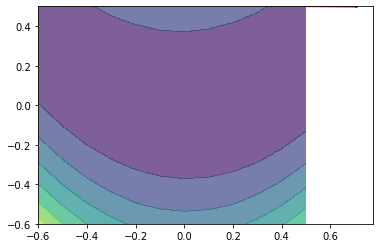

In [70]:
plotDoubleLoop_R([0.5,0.5], thres= 1e-6)

-0.856564817006984 0.7445036097452449
The method has converged after 99 iterations.



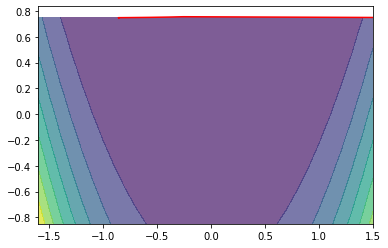

In [71]:
plotDoubleLoop_R([1.5,0.75], thres= 1e-6)

Even with that, we are not able to find the minimum. The method is not working for this function

### **2.Newton descent methods**

### 2.1 A simple quadratic function

We begin by focusing on a simple two-dimensional quadratic function.  Concretely $f(x_1,x_2)=100x_1^2+x_2^2$

#### 1.  Minimize the previous function using the gradient descent algorithm.

In [72]:
def fQ(x,y):
  return 100*x**2+y**2

In [73]:
def grad_fQ(x,y):
  return np.array([200*x,2*y])

Let us plot the function to visualize where we have the minimum.

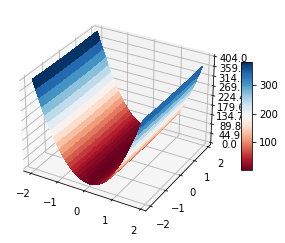

In [74]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fQ(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

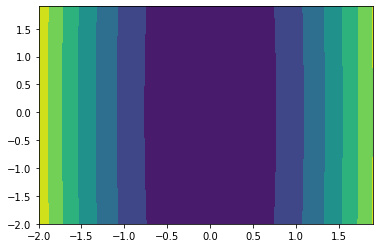

In [75]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

Notice that we have a minimum in $(0,0)$, but notice that near that point the plot seems flat, so we are close to have a line of points that reach the minimum. This can be a problem to arrive to the real minimum since the algorithm can stop when we actually it is not as close we want. Let us compute the gradient descent method. We are going to use backtracking algorithm.

In [76]:
def doubleloop_Q(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad_fQ(x_0[0],x_0[1])
      while fQ(x_k[0],x_k[1])>fQ(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0-alpha*grad_fQ(x_0[0],x_0[1])
      if fQ(x_k[0],x_k[1])<fQ(x_0[0],x_0[1]):
        if abs(fQ(x_k[0], x_k[1]) - fQ(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i

In [79]:
def plotDoubleLoop_Q(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1-0.1,1+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-1-0.1,1+0.1, 0.1)
    else: 
        x=np.arange(-abs(x0[0])-0.1,abs(x0[0])+0.1, 0.1)
        y=np.arange(-abs(x0[1])-0.1,abs(x0[1])+0.1, 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= fQ(X,Y)
    x_path, y_path,iter = doubleloop_Q(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1],y_path[-1])
    print('The method has converged after '+str(iter)+ ' iterations.\n')

1.610856196490441e-17 0.17683490169971539
The method has converged after 67 iterations.



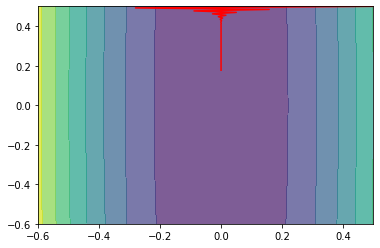

In [80]:
plotDoubleLoop_Q([0.5,0.5],1e-3)

-1.82864815251838e-25 0.21032794156281348
The method has converged after 99 iterations.



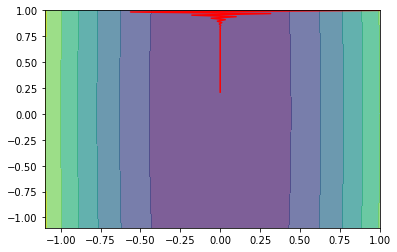

In [81]:
plotDoubleLoop_Q([1,1],1e-3)

-0.0031712119389339932 0.0
The method has converged after 11 iterations.



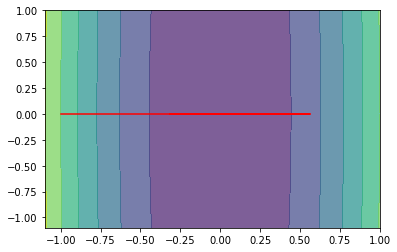

In [82]:
plotDoubleLoop_Q([-1,0],1e-3)

-1.610856196490441e-17 -0.17683490169971539
The method has converged after 67 iterations.



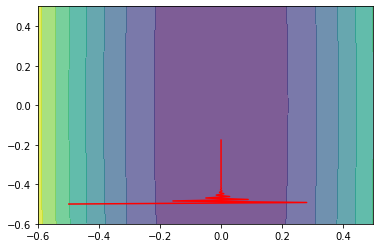

In [83]:
plotDoubleLoop_Q([-0.5,-0.5],1e-3)

Clearly, the minimum is in $(0,0)$. After some iterations, we reach the point

#### 2.   minimize the previous function using the Newton method

Let us compute the Hessian matrix first and compute Newton method

In [84]:
A=np.zeros((2,2))
A[0,0]=200
A[1,0]=0
A[0,1]=0
A[1,1]=2

def Newton(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=0.5
    for i in range(1,100):
      d_k=np.linalg.solve(A,-grad_fQ(x_0[0],x_0[1]))
      x_k=x_0+alpha*d_k
      while fQ(x_k[0],x_k[1])>fQ(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0+alpha*d_k
      if fQ(x_k[0],x_k[1])<fQ(x_0[0],x_0[1]):
        if abs(fQ(x_k[0], x_k[1]) - fQ(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
        
    return x_path, y_path,i

In [148]:
def plotDoubleLoop_Newton(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= fQ(X,Y)
    x_path, y_path,iter =Newton(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1],y_path[-1])
    print('The method has converged after '+str(iter)+ ' iterations.\n')

0.001953125 0.001953125
The method has converged after 10 iterations.



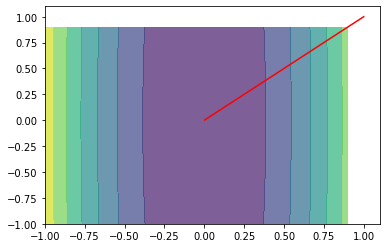

In [149]:
plotDoubleLoop_Newton([1,1],1e-3)

0.001953125 0.001953125
The method has converged after 9 iterations.



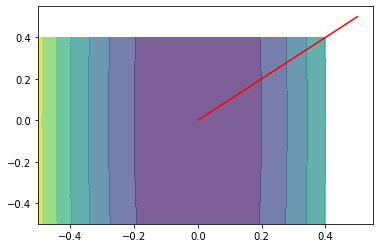

In [150]:
plotDoubleLoop_Newton([0.5,0.5],1e-3)

-0.001953125 0.0
The method has converged after 10 iterations.



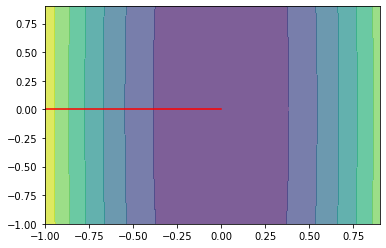

In [151]:
plotDoubleLoop_Newton([-1,0],1e-3)

-0.001953125 -0.001953125
The method has converged after 9 iterations.



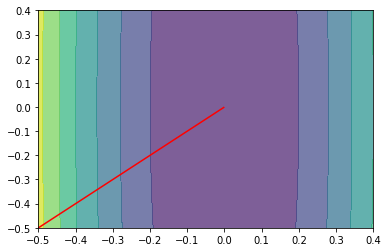

In [152]:
plotDoubleLoop_Newton([-0.5,-0.5],1e-3)

Notice that the Newton method converge to the minimum faster than the gradient descent method. The amount of iterations we need, are lees than 10 in most of the cases. There were points on the other method that 100 iterations were needed!!

### 2.2 A function with multiple minima

In [85]:
import pandas as pd

indicador= np.zeros((10))
for i in range(10):
    punt = [i, i+1]
    if(i%2)==0:
        indicador = 1

prova = pd.DataFrame({
    'punts_x': punt[:,0],
    'punts_y': punt[:, 1],
    'indicador': indicador
})

TypeError: list indices must be integers or slices, not tuple

In [96]:
import pandas as pd

indicador= np.zeros((10))
punt = np.zeros((10, 2))
for i in range(10):
    punt[i,0] = i
    punt[i, 1]= i+1
    if(i%2)==0:
        indicador[i] = 1

print(punt)
print(indicador)

[[ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]
 [ 3.  4.]
 [ 4.  5.]
 [ 5.  6.]
 [ 6.  7.]
 [ 7.  8.]
 [ 8.  9.]
 [ 9. 10.]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


In [105]:
prova = pd.DataFrame({
    'punts_x': punt[:,0],
    'punts_y': punt[:, 1],
    'indicador': indicador
})
prova.head()

,punts_x,punts_y,indicador
0,0.0,1.0,1.0
1,1.0,2.0,0.0
2,2.0,3.0,1.0
3,3.0,4.0,0.0
4,4.0,5.0,1.0


indicador
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: punts_y, dtype: object

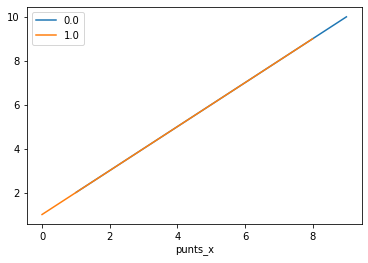

In [108]:
#prova.set_index('punts_x', inplace=True)
prova.groupby('indicador')['punts_y'].plot(legend=True)

indicador
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: punts_y, dtype: object

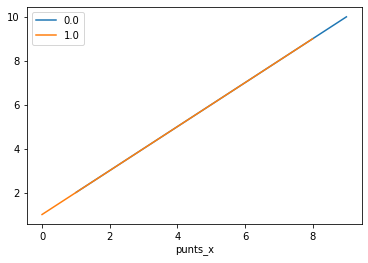

In [110]:
prova.groupby('indicador')['punts_y'].plot( legend=True)

In [5]:
import numpy as np

x = np.zeros(10)
for i in range(10):
    x[i] =i
print(max(5, x.any()))
print(x.any())

5
True
